In [1]:
import numpy as np
import pandas as pd

In [2]:
RANDOM_SEED = 42

In [3]:
# use pandas to load data into a DataFrame
df = pd.read_csv("/kaggle/input/gammafest-water-feasability/mapped-v2_imputed.csv")
print(df.shape)
df.head()

(35970, 39)


,DC216,DC220,DC142a,DC024,DC025,DC205,DC206,DC207,DC208,DC209,...,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC201
0,1.0,80.0,60.0,0,1,6.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0,1.0,1.0
1,2.0,44.0,70.0,0,1,13.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1,3.0,1.0
2,2.0,35.0,75.0,0,1,2.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3,0.0,1.0
3,3.0,79.0,85.0,0,1,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0,0.0,1.0
4,2.0,37.0,65.0,0,1,2.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1,0.0,1.0


In [4]:
target = 'DC201'

In [5]:
df[target].value_counts()

1.0    32398
0.0     3572
Name: DC201, dtype: int64

In [6]:
# # ENCODER

# df_replace = df.replace({
#     'DC109': {11:0, 12:1, 21:2, 31:3, 32:4, 33:5, 41:6, 51:7, 96:8}, 
#     'DC270a': {1:0, 2:1, 3:2, 4:3, 5:4},
#     # 'DC252': {2: 20, 1: 10}, same
#     # 'DC246': {2: 20, 1: 10},
#     # 'DC244': {2: 20, 1: 10},
#     # 'DC242': {2: 20, 1: 10},
#     'DC241': {1:0, 2:1, 3:2, 6:3},
#     'DC237f': {8:2},
#     'DC237e': {8:2},
#     'DC237d': {8:2},
#     'DC237c': {8:2},
#     'DC237b': {8:2},
#     'DC237a': {8:2},
#     'DC237': {8:2},
#     'DC235': {1:0, 2:1, 3:2},
#     # 'DC232b': {2: 20, 1: 10},
#     # 'DC232': {2: 20, 1: 10},
#     # 'DC230b': {2: 20, 1: 10},
#     'DC230a': {1:0, 2:1, 3:2, 4:3, 5:4},
#     'DC226': {1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7, 9:8, 10:9, 11:10, 95:11, 96:12},
#     'DC219': {1:0, 2:1},
#     # 'DC217': {2: 20, 1: 10},
#     'DC215': {10:0, 12:1, 13:2, 20:3, 21:4, 22:5, 23:6, 30:7, 31:8, 32:9, 33:10, 34:11, 35:12, 36:13, 96:14},
#     'DC024': {11:0, 12:1, 13:2, 14:3, 15:4, 16:5, 17:6, 18:7, 19:8, 21:9, 31:10, 32:11, 33:12, 34:13, 35:14, 36:15, 51:16,
#               52:17, 53:18, 61:19, 62:20, 63:21, 64:22, 65:23, 71:24, 72:25, 73:26, 74:27, 75:28, 76:29, 81:30, 82:31, 91:32, 94:33},
#     'DC025': {1:0, 2:1},
#     'DC205': {10:0, 11:1, 12:2, 13:3, 14:4, 15:5, 16:6, 17:7, 20:8, 21:9, 22:10, 23:11, 30:12, 31:13, 41:14, 42:15, 43:16, 96:17},
#     'DC206': {0:0, 1:1},
#     'DC207': {0:0, 1:1},
#     'DC208': {0:0, 1:1},
#     'DC209': {0:0, 1:1},
#     'DC210': {0:0, 1:1},
#     'DC211': {0:0, 1:1},
#     'DC212': {0:0, 1:1},
#     'DC213': {10:0, 11:1, 12:2, 20:3, 21:4, 22:5, 30:6, 31:7, 32:8, 33:9, 34:10, 35:11, 36:12, 96:13},
#     'DC214': {10:0, 12:1, 13:2, 20:3, 21:4, 22:5, 23:6, 24:7, 25:8, 26:9, 30:10, 31:11, 32:12, 34:13, 35:14, 36:15, 37:16, 38:17, 96:18}

In [7]:
NUMERICAL_DATA = ['DC216', 'DC220', 'DC142a']
CATEGORICAL_DATA = [column for column in df.columns if column != target and column not in NUMERICAL_DATA]

COLUMN_CATEGORICAL_INDEX = []

for column in CATEGORICAL_DATA:
    COLUMN_CATEGORICAL_INDEX.append(df.columns.get_loc(column))

In [8]:
from collections import Counter
from imblearn.over_sampling import SMOTENC

label_sampling = df[target]
feature_sampling = df.drop(target, axis=1)

counter = Counter(label_sampling)
print(counter)

oversample = SMOTENC(sampling_strategy=0.5,
                     categorical_features=COLUMN_CATEGORICAL_INDEX,
                     random_state=42)
feature_sampling, label_sampling = oversample.fit_resample(feature_sampling, label_sampling)

counter = Counter(label_sampling)
print(counter)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Counter({1.0: 32398, 0.0: 3572})
Counter({1.0: 32398, 0.0: 16199})


In [104]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()

# X_sampling = feature_sampling[['DC024', 'DC142a', 'DC220', 'DC214', 'DC213', 'DC216', 'DC109',
#                             'DC205', 'DC235', 'DC270a', 'DC252', 'DC215', 'DC226', 'DC230a']]

# X_sampling = np.array(scaler.fit_transform(X_sampling))

X_sampling = feature_sampling
# X_sampling = np.array(scaler.fit_transform(feature_sampling))
# df_copy = df.drop(target, axis=1)
# df_copy = df_sample.drop(target, axis=1)
# X_all = pd.DataFrame(scaler.fit_transform(df_copy))

# numerical_df = df[NUMERICAL_DATA].copy()
# categorical_df = df[CATEGORICAL_DATA].astype('category').copy()

# norm_numerical_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns=NUMERICAL_DATA)
# # encoded_df = pd.get_dummies(categorical_df)
# encoded_df = categorical_df.copy()

# merged_df = pd.concat([norm_numerical_df, encoded_df], axis=1)

y = np.array(label_sampling.copy())
# y = np.array(df[target])
# y = np.array(df_sample[target])
# X = np.array(merged_df)
# X_all

In [105]:
from sklearn.model_selection import train_test_split

# X_train, X_val, y_train, y_val = train_test_split(X_all, y, train_size = 0.8,
#                                                   random_state = RANDOM_SEED)

X_train, X_val, y_train, y_val = train_test_split(X_sampling, y, train_size = 0.8,
                                                  random_state = RANDOM_SEED)

# We will keep the shuffle = True since our dataset has not any time dependency.

In [106]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [107]:
xgb = XGBClassifier(tree_method='gpu_hist', gpu_id=0, n_estimators=1000,
                    learning_rate = 0.1, objective='binary:logistic',
                    random_state = RANDOM_SEED)

# xgb.fit(X_train_fit,y_train_fit, eval_set = [(X_train_eval,y_train_eval)])

In [108]:
from datetime import datetime

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [109]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import StratifiedKFold

folds = 5
param_comb = 10

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = RANDOM_SEED)

In [110]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [7],
        'gamma': [0.0005],
        'subsample': [0.8],
        'colsample_bytree': [1.0],
        'max_depth': [12]
        }

# {'colsample_bytree': 1.0, 'gamma': 0.3, 'max_depth': 12, 'min_child_weight': 15, 'subsample': 0.8} 0.8666564736217843 94.22% valset
# {'colsample_bytree': 1.0, 'gamma': 0.1, 'max_depth': 12, 'min_child_weight': 15, 'subsample': 0.8} 0.8669266432721585 94.27% valset
# {'colsample_bytree': 1.0, 'gamma': 0.001, 'max_depth': 12, 'min_child_weight': 15, 'subsample': 0.8} 0.8677753975399145 94.31% valset
# {'colsample_bytree': 1.0, 'gamma': 0.0008, 'max_depth': 12, 'min_child_weight': 15, 'subsample': 0.8} 0.8680840692868039 94.31% valset
# {'colsample_bytree': 1.0, 'gamma': 0.0006, 'max_depth': 12, 'min_child_weight': 15, 'subsample': 0.8} 0.8680840692868039 94.27% valset
# {'colsample_bytree': 1.0, 'gamma': 0.0006, 'max_depth': 12, 'min_child_weight': 13, 'subsample': 0.8} 0.8687400079132861 94.25% valset
# {'colsample_bytree': 1.0, 'gamma': 0.0006, 'max_depth': 12, 'min_child_weight': 9, 'subsample': 0.8} 0.8718266211816459 94.54% valset
# {'colsample_bytree': 1.0, 'gamma': 0.0005, 'max_depth': 12, 'min_child_weight': 7, 'subsample': 0.8} 0.8780770863625917 94.68% valset
# {'colsample_bytree': 1.0, 'gamma': 0.0005, 'max_depth': 12, 'min_child_weight': 7, 'subsample': 0.8} 0.8780770863625917
# {'colsample_bytree': 1.0, 'gamma': 0.0005, 'max_depth': 12, 'min_child_weight': 7, 'subsample': 0.8} 0.8789258852877186 no normalization

In [111]:
grid = GridSearchCV(estimator=xgb, param_grid=params,
                    scoring='f1_micro', n_jobs=-1,
                    cv=skf, verbose=3)

start_time = timer(None) # timing starts from this point for "start_time" variable
# grid.fit(X_train_fit, y_train_fit)
grid.fit(X_train, y_train)
# grid.fit(X, y)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 1 candidates, totalling 5 fits

 Time taken: 0 hours 0 minutes and 33.98 seconds.


In [112]:
print('\n All results:')
print(grid.cv_results_)
print('\n Best estimator:')
print(grid.best_estimator_)
print('\n Best score:')
print(grid.best_score_ * 2 - 1)
print('\n Best parameters:')
print(grid.best_params_)


 All results:
{'mean_fit_time': array([10.50459428]), 'std_fit_time': array([3.36384131]), 'mean_score_time': array([0.56316628]), 'std_score_time': array([0.04555655]), 'param_colsample_bytree': masked_array(data=[1.0],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.0005],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_max_depth': masked_array(data=[12],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_min_child_weight': masked_array(data=[7],
             mask=[False],
       fill_value='?',
            dtype=object), 'param_subsample': masked_array(data=[0.8],
             mask=[False],
       fill_value='?',
            dtype=object), 'params': [{'colsample_bytree': 1.0, 'gamma': 0.0005, 'max_depth': 12, 'min_child_weight': 7, 'subsample': 0.8}], 'split0_test_score': array([0.92605453]), 'split1_test_score': array([0.92785494]), 'split2_test_sco

In [113]:
# print(f"Metrics train:\n\tAccuracy score: {accuracy_score(xgb.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(xgb.predict(X_val),y_val):.4f}")
# print(f"Metrics train:\n\tAccuracy score: {accuracy_score(random_search.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(random_search.predict(X_val),y_val):.4f}")
print(f"Metrics train:\n\tAccuracy score: {accuracy_score(grid.best_estimator_.predict(X_train),y_train):.4f}\nMetrics test:\n\tAccuracy score: {accuracy_score(grid.best_estimator_.predict(X_val),y_val):.4f}")

Metrics train:
	Accuracy score: 1.0000
Metrics test:
	Accuracy score: 0.9242


In [114]:
from sklearn.metrics import classification_report, f1_score

# predictions = xgb.predict(X_val)
# predictions = random_search.predict(X_val)
predictions = grid.best_estimator_.predict(X_val)
print(classification_report(y_val,predictions, digits=4))
print(f1_score(y_val, predictions))

              precision    recall  f1-score   support

         0.0     0.8973    0.8739    0.8854      3259
         1.0     0.9372    0.9495    0.9433      6461

    accuracy                         0.9242      9720
   macro avg     0.9173    0.9117    0.9144      9720
weighted avg     0.9238    0.9242    0.9239      9720

0.9433382025063427


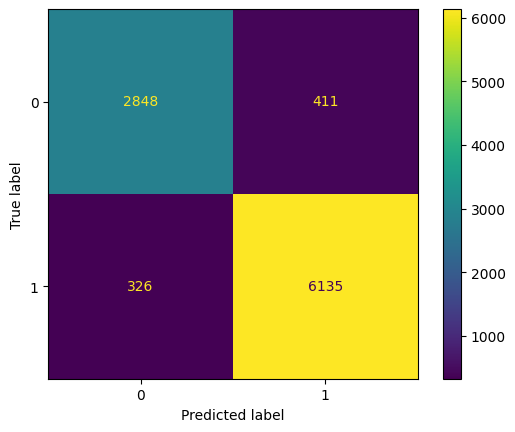

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_val, predictions)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [116]:
# use custom threshold
from sklearn.metrics import log_loss, precision_recall_curve, f1_score

def choose_best_threshold(probas, target):
    ''' iterates over thresholds to choose the one with the highest f1 score '''
    results = dict()
    precision, recall, thresholds = precision_recall_curve(target, probas)
    f1_scores = 2 * recall * precision / (recall + precision)
    best_f1_ind = np.argmax(f1_scores)
    results['best_threshold'] = thresholds[best_f1_ind]
    results['validation_precision']      = precision[best_f1_ind]
    results['validation_recall']         = recall[best_f1_ind]
    results['validation_f1_score']  = np.max(f1_scores)
    return results 

prob_predictions = grid.best_estimator_.predict_proba(X_val)[:, 1]
threshold = choose_best_threshold(prob_predictions, y_val)
print(threshold)

P_prod = grid.best_estimator_.predict_proba(X_val)[:, 1] > threshold['best_threshold']
# P_prod = grid.best_estimator_.predict_proba(X_val)[:, 1] > 0.5
print(classification_report(y_val,P_prod, digits=4))
print(f1_score(y_val, P_prod))

{'best_threshold': 0.23226209, 'validation_precision': 0.9156050955414012, 'validation_recall': 0.9789506268379508, 'validation_f1_score': 0.9462188645373626}
              precision    recall  f1-score   support

         0.0     0.9513    0.8211    0.8814      3259
         1.0     0.9156    0.9788    0.9461      6461

    accuracy                         0.9259      9720
   macro avg     0.9334    0.9000    0.9138      9720
weighted avg     0.9276    0.9259    0.9244      9720

0.9461400359066428


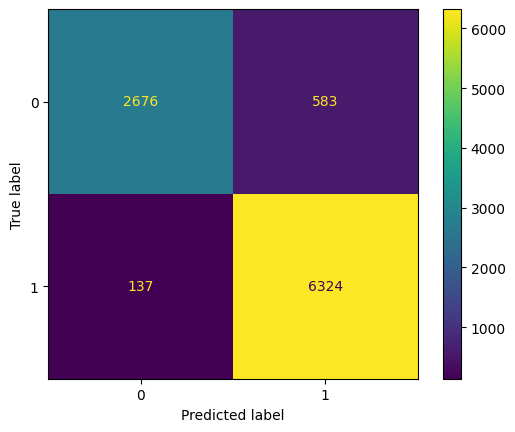

In [117]:
cm = confusion_matrix(y_val, P_prod)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

# Test for submit

In [118]:
test_df = pd.read_csv("/kaggle/input/gammafest-water-feasability/test.csv")
print(test_df.shape)
test_df.head()

(11990, 39)


,id,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,...,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a
0,26718,35,2,17,1,0,1,0,1,1,...,0,0,1,1,1,1,1,3,21,52
1,26802,35,1,12,1,1,1,1,0,1,...,0,0,1,1,0,0,1,2,11,18
2,41302,74,2,12,1,0,1,1,1,1,...,0,0,1,0,0,1,4,5,11,78
3,38698,72,1,12,1,1,0,0,0,0,...,0,0,1,0,1,0,0,1,11,20
4,44257,76,2,12,1,0,1,0,0,1,...,0,0,1,1,1,1,1,3,11,125


In [119]:
test_id = test_df.pop('id')

In [120]:
# ENCODER

test_df = test_df.replace({
    'DC109': {11:0, 12:1, 21:2, 31:3, 32:4, 33:5, 41:6, 51:7, 96:8}, 
    'DC270a': {1:0, 2:1, 3:2, 4:3, 5:4},
    # 'DC252': {2: 20, 1: 10}, same
    # 'DC246': {2: 20, 1: 10},
    # 'DC244': {2: 20, 1: 10},
    # 'DC242': {2: 20, 1: 10},
    'DC241': {1:0, 2:1, 3:2, 6:3},
    'DC237f': {8:2},
    'DC237e': {8:2},
    'DC237d': {8:2},
    'DC237c': {8:2},
    'DC237b': {8:2},
    'DC237a': {8:2},
    'DC237': {8:2},
    'DC235': {1:0, 2:1, 3:2},
    # 'DC232b': {2: 20, 1: 10},
    # 'DC232': {2: 20, 1: 10},
    # 'DC230b': {2: 20, 1: 10},
    'DC230a': {1:0, 2:1, 3:2, 4:3, 5:4},
    'DC226': {1:0, 2:1, 3:2, 4:3, 5:4, 6:5, 7:6, 8:7, 9:8, 10:9, 11:10, 95:11, 96:12},
    'DC219': {1:0, 2:1},
    # 'DC217': {2: 20, 1: 10},
    'DC215': {10:0, 12:1, 13:2, 20:3, 21:4, 22:5, 23:6, 30:7, 31:8, 32:9, 33:10, 34:11, 35:12, 36:13, 96:14},
    'DC024': {11:0, 12:1, 13:2, 14:3, 15:4, 16:5, 17:6, 18:7, 19:8, 21:9, 31:10, 32:11, 33:12, 34:13, 35:14, 36:15, 51:16,
              52:17, 53:18, 61:19, 62:20, 63:21, 64:22, 65:23, 71:24, 72:25, 73:26, 74:27, 75:28, 76:29, 81:30, 82:31, 91:32, 94:33},
    'DC025': {1:0, 2:1},
    'DC205': {10:0, 11:1, 12:2, 13:3, 14:4, 15:5, 16:6, 17:7, 20:8, 21:9, 22:10, 23:11, 30:12, 31:13, 41:14, 42:15, 43:16, 96:17},
    'DC206': {0:0, 1:1},
    'DC207': {0:0, 1:1},
    'DC208': {0:0, 1:1},
    'DC209': {0:0, 1:1},
    'DC210': {0:0, 1:1},
    'DC211': {0:0, 1:1},
    'DC212': {0:0, 1:1},
    'DC213': {10:0, 11:1, 12:2, 20:3, 21:4, 22:5, 30:6, 31:7, 32:8, 33:9, 34:10, 35:11, 36:12, 96:13},
    'DC214': {10:0, 12:1, 13:2, 20:3, 21:4, 22:5, 23:6, 24:7, 25:8, 26:9, 30:10, 31:11, 32:12, 34:13, 35:14, 36:15, 37:16, 38:17, 96:18}
    })

In [121]:
test_df = test_df.astype(float)

In [122]:
test_df.head()

,DC024,DC025,DC205,DC206,DC207,DC208,DC209,DC210,DC211,DC212,...,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109,DC142a
0,14.0,1.0,7.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,52.0
1,14.0,0.0,2.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,18.0
2,27.0,1.0,2.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,0.0,78.0
3,25.0,0.0,2.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,20.0
4,29.0,1.0,2.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0,125.0


In [123]:
NUMERICAL_DATA = ['DC216', 'DC220', 'DC142a']
CATEGORICAL_DATA = [column for column in test_df.columns if column != target and column not in NUMERICAL_DATA]

COLUMN_CATEGORICAL_INDEX = []

for column in CATEGORICAL_DATA:
    COLUMN_CATEGORICAL_INDEX.append(test_df.columns.get_loc(column))

In [124]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
scaler = MinMaxScaler()
# scaler = StandardScaler()

numerical_df = test_df[NUMERICAL_DATA].copy()
categorical_df = test_df[CATEGORICAL_DATA].copy()

merged_df = pd.concat([numerical_df, categorical_df], axis=1)
X_test_submit = np.array(merged_df)

In [125]:
merged_df

,DC216,DC220,DC142a,DC024,DC025,DC205,DC206,DC207,DC208,DC209,...,DC237d,DC237e,DC237f,DC241,DC242,DC244,DC246,DC252,DC270a,DC109
0,1.0,29.0,52.0,14.0,1.0,7.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0
1,1.0,42.0,18.0,14.0,0.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
2,2.0,46.0,78.0,27.0,1.0,2.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0,4.0,0.0
3,1.0,46.0,20.0,25.0,0.0,2.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3.0,47.0,125.0,29.0,1.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11985,2.0,36.0,70.0,23.0,1.0,2.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0
11986,2.0,43.0,120.0,19.0,1.0,2.0,1.0,0.0,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,3.0,0.0
11987,2.0,45.0,72.0,27.0,0.0,2.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
11988,1.0,20.0,9.0,27.0,1.0,13.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,7.0


In [128]:
P_prod_submit = grid.best_estimator_.predict_proba(X_test_submit)[:, 1] > threshold['best_threshold']
# P_prod_submit = grid.best_estimator_.predict(X_test_submit)
P_prod_submit

array([ True,  True,  True, ...,  True,  True,  True])

In [129]:
result = []
for prediction in P_prod_submit:
    result.append('Layak Minum' if prediction==1 else 'Tidak Layak Minum')
pd.DataFrame(result).value_counts()

Layak Minum          11391
Tidak Layak Minum      599
dtype: int64

In [130]:
finish_pd = pd.DataFrame({'id':test_id.values, 'DC201':result})
finish_pd

,id,DC201
0,26718,Layak Minum
1,26802,Layak Minum
2,41302,Layak Minum
3,38698,Layak Minum
4,44257,Layak Minum
...,...,...
11985,36943,Layak Minum
11986,33415,Layak Minum
11987,41998,Layak Minum
11988,41567,Layak Minum


In [59]:
finish_pd.to_csv('result_xgboost_minmax_mapped_smote05_non_custom_threshold.csv', index=False)

In [60]:
check_pd = pd.read_csv('/kaggle/working/result_xgboost_minmax_mapped_smote05_non_custom_threshold.csv')
check_pd

,id,DC201
0,26718,Layak Minum
1,26802,Layak Minum
2,41302,Layak Minum
3,38698,Layak Minum
4,44257,Layak Minum
...,...,...
11985,36943,Layak Minum
11986,33415,Layak Minum
11987,41998,Layak Minum
11988,41567,Layak Minum


In [62]:
check_pd['DC201'].value_counts()

Layak Minum          10929
Tidak Layak Minum     1061
Name: DC201, dtype: int64